<a href="https://colab.research.google.com/github/mchanwa/COS424/blob/main/COS_424_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import math

# Data Cleaning

In [34]:
# Read data. Clean a bit.
file1 = open('/content/drive/MyDrive/HW3Files/CCRB_database_raw.csv', 'r') 
complaints_df = pd.read_csv(file1)

complaints_df = complaints_df.drop(['ShieldNo', 'AsOfDate'], axis=1)

# Fix up some common typos in the dataset.
allegations_correction_dict = {
    'Vehicle Searched': 'Vehicle search',
    'Other - Ethnic Slur': 'Ethnic Slur',
    'Refusal to provide shield number': 'Refusal to provide name/shield number',
    'Refusal to provide name': 'Refusal to provide name/shield number',
    'Property Damaged': 'Property damaged',
    'Gun Pointed': 'Gun pointed/gun drawn',
    'Gun pointed': 'Gun pointed/gun drawn',
    'Threat of Arrest': 'Threat of arrest',
    'Other- Discourtesy': 'Discourtesy',
    'Premise Searched': 'Premises entered and/or searched',
    'Entry of Premises': 'Premises entered and/or searched',
    'Search of Premises': 'Premises entered and/or searched',
    'Threat of Summons': 'Threat of summons',
    'Property Damaged': 'Property damaged',
    'Flashlight As Club': 'Flashlight As club',
    'Radio As Club': 'Radio as club',
    'Gun Fired': 'Gun fired',
    'Gun As Club': 'Gun As club',
}

penalty_correction_dict = {
    'Terminated': 'Termination',
}

complaints_df['Allegation'] = complaints_df['Allegation'].replace(allegations_correction_dict)
complaints_df['PenaltyDesc'] = complaints_df['PenaltyDesc'].replace(penalty_correction_dict)
complaints_df['Full Name'] = complaints_df['First Name'] + " " + complaints_df['Last Name']

complaints_df['Incident Date'] = pd.to_datetime(complaints_df['Incident Date'], format='%m/%d/%Y')
dates = complaints_df["Incident Date"]

complaints_df['day'] = complaints_df['Incident Date'].dt.day
complaints_df['month'] = complaints_df['Incident Date'].dt.month
complaints_df['year'] = complaints_df['Incident Date'].dt.year

complaints_df = complaints_df.drop(['Incident Date'], axis=1)
complaints_df = complaints_df.dropna(how='any', subset=['Allegation'])

In [35]:
complaints_df.head(10)

,Unique Id,First Name,Last Name,Rank,Command,Complaint Id,FADO Type,Allegation,Board Disposition,NYPDDisposition,PenaltyDesc,Full Name,day,month,year
0,43921,Richard,Aalbue,POM,H BKLYN,6290465.0,Force,Force,Unsubstantiated,NaN,NaN,Richard Aalbue,NaN,NaN,NaN
1,52580,Walter,Aanonsen,LT,MOUNTED,8300607.0,Force,Force,Complainant Unavailable,NaN,NaN,Walter Aanonsen,NaN,NaN,NaN
2,52580,Walter,Aanonsen,LT,MOUNTED,8800504.0,Force,Beat,Unsubstantiated,NaN,NaN,Walter Aanonsen,15.0,2.0,1988.0
3,52580,Walter,Aanonsen,LT,MOUNTED,9201176.0,Abuse of Authority,Vehicle search,Unsubstantiated,NaN,NaN,Walter Aanonsen,2.0,4.0,1992.0
4,52580,Walter,Aanonsen,LT,MOUNTED,9201176.0,Discourtesy,Nasty Words,Unsubstantiated,NaN,NaN,Walter Aanonsen,2.0,4.0,1992.0
5,52580,Walter,Aanonsen,LT,MOUNTED,9201176.0,Abuse of Authority,Detention,Unsubstantiated,NaN,NaN,Walter Aanonsen,2.0,4.0,1992.0
6,52580,Walter,Aanonsen,LT,MOUNTED,9600472.0,Offensive Language,Ethnic Slur,Unfounded,NaN,NaN,Walter Aanonsen,13.0,10.0,1995.0
7,52580,Walter,Aanonsen,LT,MOUNTED,9600472.0,Abuse of Authority,Vehicle search,Exonerated,NaN,NaN,Walter Aanonsen,13.0,10.0,1995.0
8,52580,Walter,Aanonsen,LT,MOUNTED,9600472.0,Offensive Language,Black,Unfounded,NaN,NaN,Walter Aanonsen,13.0,10.0,1995.0
9,52580,Walter,Aanonsen,LT,MOUNTED,9600472.0,Force,Punch/Kick,Unfounded,NaN,NaN,Walter Aanonsen,13.0,10.0,1995.0


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
copy_complaints_df = complaints_df.copy()
copy_complaints_df.sort_values('year')
truncated_copy = copy_complaints_df.dropna()

In [38]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

allegation_types = complaints_df['Allegation'].unique()
allegation_types = allegation_types.astype(str)
allegation_types = np.sort(allegation_types)
print(allegation_types)
print(allegation_types.shape)

['Abuse of Authority' 'Action' 'Animal' 'Arrest/D. A. T.'
 'Arrest/Onlooker' 'Beat' 'Black' 'Body Cavity Searches' 'Chokehold'
 'Curse' 'Demeanor/tone' 'Detention' 'Discourtesy' 'Dragged/Pulled'
 'Electronic device information deletion' 'Ethnic Slur' 'Ethnicity'
 'Failed to Obtain Language Interpretation' 'Failure to provide RTKA card'
 'Flashlight As club' 'Flashlight as club' 'Force'
 'Forcible Removal to Hospital' 'Frisk' 'Frisk and/or search'
 'Gay/Lesbian Slur' 'Gender' 'Gender Identity' 'Gesture' 'Gun As club'
 'Gun Drawn' 'Gun as club' 'Gun fired' 'Gun pointed/gun drawn'
 'Handcuffs too tight' 'Hispanic' 'Hit against inanimate object'
 'Improper dissemination of medical info' 'Interference with recording'
 'Jewish' 'Mace' 'Nasty Words' 'Nightstick as club (incl asp & baton)'
 'Nightstick/Billy/Club' 'Nonlethal restraining device' 'Oriental' 'Other'
 'Other - Abuse' 'Other - Force' 'Other Asian'
 'Other blunt instrument as a club' 'Pepper spray' 'Person Searched'
 'Photography/Vi

In [39]:
officer_counts = complaints_df['Full Name'].value_counts().reset_index()
officer_counts.columns = ['Officer', 'Number of complaints']
print(officer_counts.shape)
officer_counts.head(10)

(44160, 2)


,Officer,Number of complaints
0,Robert Currie,173
1,Michael Elliott,159
2,Robert Rodriguez,134
3,John Coghlan,127
4,Michael Murphy,113
5,George Whalen,113
6,Robert Martinez,110
7,Kevin Martin,109
8,Steven Deluca,109
9,Glen Halfhide,109


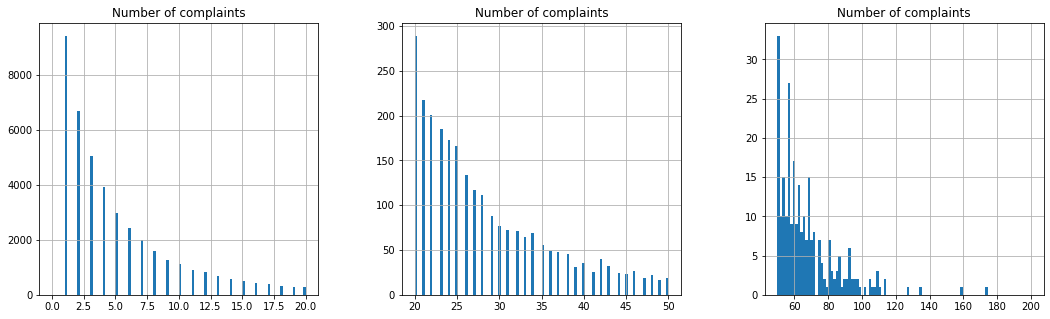

In [40]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches(18, 5)

hist = officer_counts.hist(bins=100, range = [0, 20], ax=ax[0])
hist = officer_counts.hist(bins=100, range = [20, 50], ax=ax[1])
hist = officer_counts.hist(bins=100, range = [50, 200], ax=ax[2])

In [41]:
allegations = complaints_df['Allegation'].value_counts().reset_index()
allegations.columns = ['Allegation', 'Count of allegation']
allegations.head(10)

,Allegation,Count of allegation
0,Physical force,39164
1,Word,27518
2,Threat of arrest,13175
3,Premises entered and/or searched,11315
4,Curse,11287
5,Push/Shove,10425
6,Force,10218
7,Refusal to provide name/shield number,9576
8,Stop,8055
9,Punch/Kick,7375


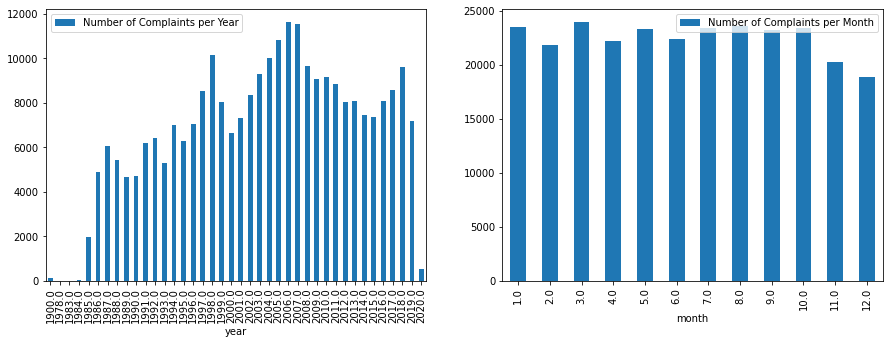

In [42]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)

years_of_complaints = complaints_df.groupby(["year"]).size().reset_index(name="Number of Complaints per Year").sort_values(by=['year'], ascending = True)

years_of_complaints.plot(kind='bar',x='year',y='Number of Complaints per Year', ax=ax[0])

months_of_complaints = complaints_df.groupby(["month"]).size().reset_index(name="Number of Complaints per Month").sort_values(by=['month'], ascending = True)
months_of_complaints.plot(kind='bar',x='month',y='Number of Complaints per Month', ax=ax[1])

years = complaints_df['year'].unique()
years = [x for x in years if (math.isnan(x) == False)]
years.sort()

# Example use of Matrix Factorization

In [43]:
from sklearn import preprocessing

officers    = np.array(complaints_df['Full Name']).astype(str)
allegations = np.array(complaints_df['Allegation']).astype(str)

# Convert from officer names and allegation names to label encoding.
le1 = preprocessing.LabelEncoder()
le1.fit(officers)

le2 = preprocessing.LabelEncoder()
le2.fit(allegations)

xs = le1.transform(officers)
ys = le2.transform(allegations)

print(xs)
print(ys)

assert len(xs) == len(ys)

[34240 42590 42590 ...  5590  5590 30226]
[21 21  5 ... 55 46 41]


In [44]:
from sklearn.decomposition import TruncatedSVD, NMF
from scipy.sparse import csr_matrix

# Get counts of each officer/allegation interaction.
non_unique_edges = zip(xs, ys)
unique_edges_with_counts = pd.Series(non_unique_edges).value_counts()

edges  = unique_edges_with_counts.index.values
counts = unique_edges_with_counts.values

u_xs, u_ys = zip(*edges)

# Construct sparse matrix data type.
X = csr_matrix((counts, (u_xs, u_ys)))

# Compute Non-negative Matrix Factorization.
n_components = 5
nmf = NMF(n_components=n_components, random_state=41)
Y = nmf.fit(X)

In [45]:
print(f'Top {n_components} components lead to reconstruction error (in Frobenius norm) of {nmf.reconstruction_err_}.')
print()

# Look at the top principle components.
W = nmf.transform(X)
print(W.shape)

topK = 5
for i in range(nmf.components_.shape[0]):
  print(f'Top allegations in component {i+1}:')
  allegs = np.argsort(nmf.components_[i])[::-1][:topK]
  for j in range(topK):
    print(f'\t{le2.classes_[allegs[j]]}')
  print()

Top 5 components lead to reconstruction error (in Frobenius norm) of 530.4947118176715.

(44161, 5)
Top allegations in component 1:
	Physical force
	Question and/or stop
	Pepper spray
	Threat of force (verbal or physical)
	Chokehold

Top allegations in component 2:
	Curse
	Push/Shove
	Punch/Kick
	Other - Force
	Threat of force

Top allegations in component 3:
	Force
	Abuse of Authority
	Discourtesy
	Ethnic Slur
	Premises entered and/or searched

Top allegations in component 4:
	Word
	Threat of arrest
	Threat of force (verbal or physical)
	Refusal to provide name/shield number
	Race

Top allegations in component 5:
	Premises entered and/or searched
	Stop
	Search (of person)
	Frisk
	Vehicle search



In [46]:
# Compute truncated SVD (uses a randomized algorithm by default).
n_components = 5
svd = TruncatedSVD(n_components=n_components, random_state=41)
Y = svd.fit(X)

# Look at the top principle components.
print(f'Top {n_components} components explain {svd.explained_variance_ratio_.sum()} of the variance.')
print(f'Breakdown: {svd.explained_variance_ratio_}\n')
print(Y)




topK = 5
for i in range(svd.components_.shape[0]):
  print(f'Top allegations in component {i+1}:')
  allegs = np.argsort(svd.components_[i])[::-1][:topK]
  for j in range(topK):
    print(f'\t{le2.classes_[allegs[j]]}')
  print()

Top 5 components explain 0.5467672679292171 of the variance.
Breakdown: [0.24622076 0.14415963 0.06367047 0.05337972 0.03933669]

TruncatedSVD(algorithm='randomized', n_components=5, n_iter=5, random_state=41,
             tol=0.0)
Top allegations in component 1:
	Physical force
	Word
	Threat of arrest
	Premises entered and/or searched
	Stop

Top allegations in component 2:
	Curse
	Push/Shove
	Punch/Kick
	Other - Force
	Threat of force

Top allegations in component 3:
	Force
	Abuse of Authority
	Discourtesy
	Ethnic Slur
	Premises entered and/or searched

Top allegations in component 4:
	Word
	Threat of arrest
	Refusal to provide name/shield number
	Premises entered and/or searched
	Threat of force (verbal or physical)

Top allegations in component 5:
	Premises entered and/or searched
	Stop
	Search (of person)
	Frisk
	Vehicle search



# CapStat.NYC Police Officer Database
Compiled from CapStat.NYC by Wendy Ho

https://github.com/wendyho/NYPD-Misconduct-Complaint-Database

In [47]:
file3 = open('/content/drive/MyDrive/HW3Files/officer_data.csv', 'r') 
police_df = pd.read_csv(file3)
police_df['Full Name'] = police_df['First Name'] + " " + police_df['Last Name']
police_df.head(10)

,Unnamed: 0,First Name,Last Name,Rank,Location,Full Name
0,0,Lori,Aanonsen,Detective Third Grade,New York,Lori Aanonsen
1,1,Walter,Aanonsen,Lieutenant,New York,Walter Aanonsen
2,2,Abdelhadi,Aanouz,Police Officer,Bronx,Abdelhadi Aanouz
3,3,Gary,Aaronson,Police Officer,Queens,Gary Aaronson
4,4,Jacob,Aaronson,Police Officer,New York,Jacob Aaronson
5,5,Robert,Aasheim,Detective Specialist,New York,Robert Aasheim
6,6,Thomas,Aasheim,Detective Second Grade,New York,Thomas Aasheim
7,7,Darsey,Abad,Detective First Grade,New York,Darsey Abad
8,8,Anthony,Abadia,Police Officer,Kings,Anthony Abadia
9,9,David,Abadia,Police Officer,Bronx,David Abadia


In [48]:
police_df_nameseries = police_df['Full Name'].values.astype(str)
df_nameseries  = complaints_df['Full Name'].values.astype(str)

df_match = complaints_df.loc[complaints_df['Full Name'].isin(police_df_nameseries)]
police_df_match = police_df.loc[police_df['Full Name'].isin(df_nameseries)]
print(f'{len(df_match)} of the {len(complaints_df)} complaints matched to a police officer in the CapStat.NYC database.')
print(f'{len(police_df_match)} of the {len(police_df)} police officers have at least one complaint against them.')

47207 of the 290228 complaints matched to a police officer in the CapStat.NYC database.
7609 of the 12450 police officers have at least one complaint against them.


In [49]:
police_df['Rank'].value_counts()

Police Officer                   7940
Sergeant                         1579
Detective Third Grade            1068
Lieutenant                        642
Detective Second Grade            413
Detective Specialist              312
Detective First Grade             189
Captain                            95
Deputy Inspector                   54
Inspector                          49
Deputy Chief Inspector             22
Assistant Chief Inspector          15
Chief                               5
Assistant Commissioner              2
Assistant Deputy Commissioner       2
Commissioner                        1
Deputy Commissioner                 1
First Deputy Commissioner           1
Name: Rank, dtype: int64

In [50]:
police_df['Location'].value_counts()

          New York    6520
          Kings       2206
          Queens      1846
          Bronx       1384
          Richmond     329
Name: Location, dtype: int64

# Our Analyses

In [51]:
from sklearn.decomposition import PCA, FactorAnalysis

In [52]:
n_components = 5
fa = FactorAnalysis(n_components=n_components, random_state=41)
X_dense = X.todense()
Y = fa.fit(X_dense)


topK = 5
for i in range(fa.components_.shape[0]):
  print(f'Top allegations in component {i+1}:')
  allegs = np.argsort(fa.components_[i])[::-1][:topK]
  for j in range(topK):
    print(f'\t{le2.classes_[allegs[j]]}')
  print()


Top allegations in component 1:
	Physical force
	Word
	Search (of person)
	Stop
	Threat of arrest

Top allegations in component 2:
	Curse
	Push/Shove
	Punch/Kick
	Other - Force
	Threat of force

Top allegations in component 3:
	Force
	Abuse of Authority
	Discourtesy
	Search (of person)
	Frisk

Top allegations in component 4:
	Word
	Physical force
	Threat of arrest
	Threat of force (verbal or physical)
	Question and/or stop

Top allegations in component 5:
	Question and/or stop
	Premises entered and/or searched
	Gun pointed/gun drawn
	Frisk and/or search
	Nasty Words



In [53]:
n_components = 5
pca = PCA(n_components=n_components, random_state=41)
X_dense = X.todense()
print(X_dense)
Y = pca.fit(X_dense)

# Look at the top principle components.
print(f'Top {n_components} components explain {pca.explained_variance_ratio_.sum()} of the variance.')
print(f'Breakdown: {pca.explained_variance_ratio_}\n')
print(Y)




topK = 5
for i in range(pca.components_.shape[0]):
  print(f'Top allegations in component {i+1}:')
  allegs = np.argsort(pca.components_[i])[::-1][:topK]
  for j in range(topK):
    print(f'\t{le2.classes_[allegs[j]]}')
  print()

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]]
Top 5 components explain 0.5469488197302922 of the variance.
Breakdown: [0.25219087 0.13961013 0.0624995  0.05337604 0.03927228]

PCA(copy=True, iterated_power='auto', n_components=5, random_state=41,
    svd_solver='auto', tol=0.0, whiten=False)
Top allegations in component 1:
	Physical force
	Word
	Threat of arrest
	Stop
	Search (of person)

Top allegations in component 2:
	Curse
	Push/Shove
	Punch/Kick
	Other - Force
	Threat of force

Top allegations in component 3:
	Force
	Abuse of Authority
	Discourtesy
	Word
	Physical force

Top allegations in component 4:
	Word
	Threat of arrest
	Refusal to provide name/shield number
	Premises entered and/or searched
	Threat of force (verbal or physical)

Top allegations in component 5:
	Premises entered and/or searched
	Stop
	Search (of person)
	Frisk
	Vehicle search



In [54]:
from sklearn.cluster import KMeans

n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X_dense)
prediction = kmeans.predict(X_dense)

In [55]:
transpose = X_dense.transpose()
X_product = np.matmul(transpose, X_dense)

print(X_product)
# Compute truncated SVD (uses a randomized algorithm by default).
n_components = 5
svd_dense = TruncatedSVD(n_components=n_components, random_state=41)
Y = svd_dense.fit(X_product)

# Look at the top principle components.
print(f'Top {n_components} components explain {svd_dense.explained_variance_ratio_.sum()} of the variance.')
print(f'Breakdown: {svd_dense.explained_variance_ratio_}\n')
print(Y)




topK = 5
for i in range(svd_dense.components_.shape[0]):
  print(f'Top allegations in component {i+1}:')
  allegs = np.argsort(svd_dense.components_[i])[::-1][:topK]
  for j in range(topK):
    print(f'\t{le2.classes_[allegs[j]]}')
  print()

[[12748   120     2 ...   293    49  2214]
 [  120  2534     0 ...   729     8  4490]
 [    2     0    45 ...     1     1     9]
 ...
 [  293   729     1 ...  7329    12  8709]
 [   49     8     1 ...    12   515    74]
 [ 2214  4490     9 ...  8709    74 81560]]
Top 5 components explain 0.9588327013373266 of the variance.
Breakdown: [0.77202157 0.13085914 0.02759488 0.01851121 0.00984591]

TruncatedSVD(algorithm='randomized', n_components=5, n_iter=5, random_state=41,
             tol=0.0)
Top allegations in component 1:
	Physical force
	Word
	Threat of arrest
	Premises entered and/or searched
	Stop

Top allegations in component 2:
	Curse
	Push/Shove
	Punch/Kick
	Other - Force
	Threat of force

Top allegations in component 3:
	Force
	Abuse of Authority
	Discourtesy
	Ethnic Slur
	Premises entered and/or searched

Top allegations in component 4:
	Word
	Threat of arrest
	Refusal to provide name/shield number
	Premises entered and/or searched
	Threat of force (verbal or physical)

Top all

In [56]:
n_components = 5
pca_dense = PCA(n_components=n_components, random_state=41)
X_dense = X.todense()
Y = pca_dense.fit(X_product)


# Look at the top principle components.
print(f'Top {n_components} components explain {pca_dense.explained_variance_ratio_.sum()} of the variance.')
print(f'Breakdown: {pca_dense.explained_variance_ratio_}\n')
print(Y)



topK = 5
for i in range(pca_dense.components_.shape[0]):
  print(f'Top allegations in component {i+1}:')
  allegs = np.argsort(pca_dense.components_[i])[::-1][:topK]
  for j in range(topK):
    print(f'\t{le2.classes_[allegs[j]]}')
  print()

Top 5 components explain 0.9589163436788821 of the variance.
Breakdown: [0.77513681 0.12800648 0.02755661 0.01847249 0.00974396]

PCA(copy=True, iterated_power='auto', n_components=5, random_state=41,
    svd_solver='auto', tol=0.0, whiten=False)
Top allegations in component 1:
	Physical force
	Word
	Threat of arrest
	Premises entered and/or searched
	Stop

Top allegations in component 2:
	Curse
	Push/Shove
	Punch/Kick
	Other - Force
	Threat of force

Top allegations in component 3:
	Force
	Abuse of Authority
	Discourtesy
	Ethnic Slur
	Premises entered and/or searched

Top allegations in component 4:
	Word
	Threat of arrest
	Refusal to provide name/shield number
	Premises entered and/or searched
	Threat of force (verbal or physical)

Top allegations in component 5:
	Premises entered and/or searched
	Stop
	Search (of person)
	Frisk
	Vehicle search



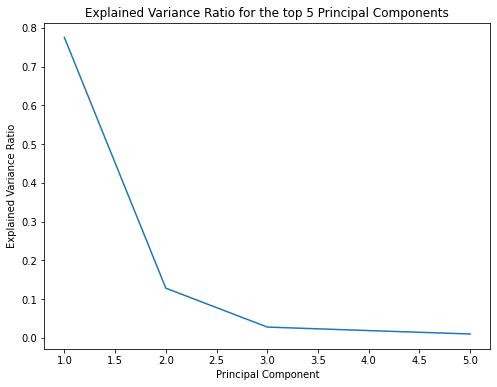

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, 6, 1), pca_dense.explained_variance_ratio_)
plt.title('Explained Variance Ratio for the top 5 Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.show()

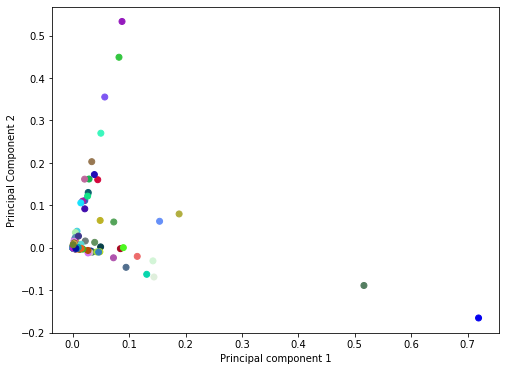

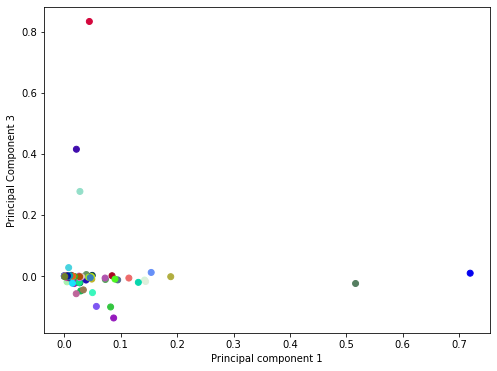

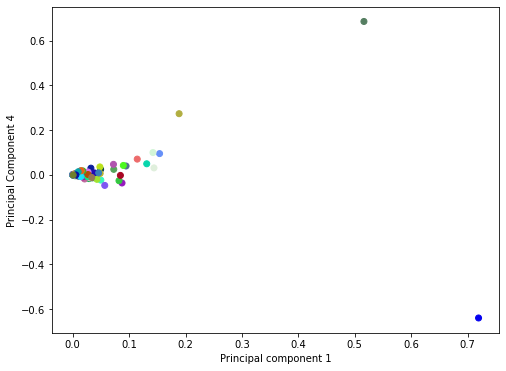

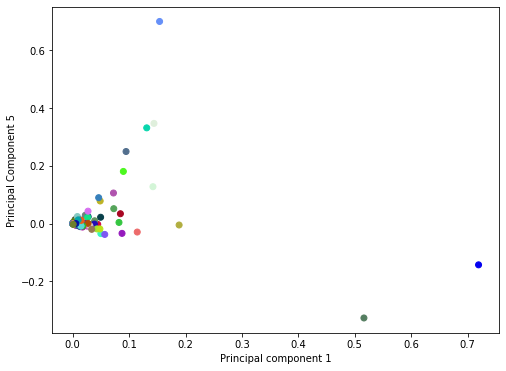

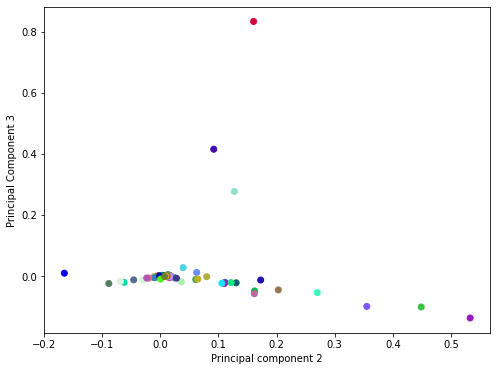

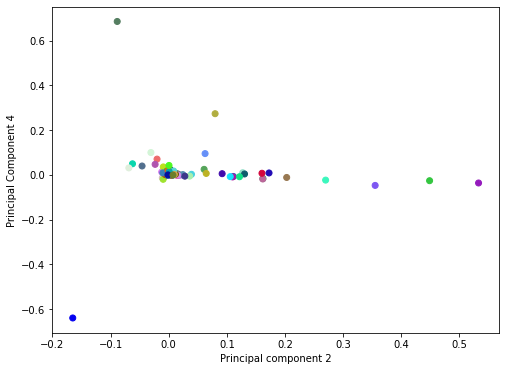

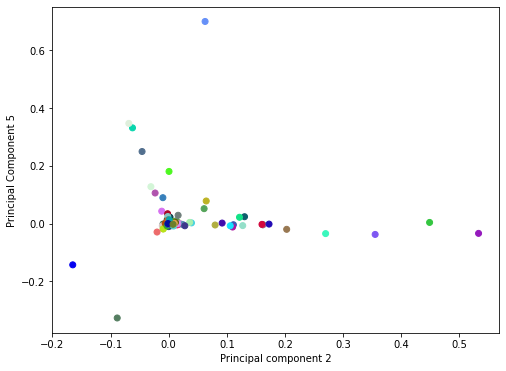

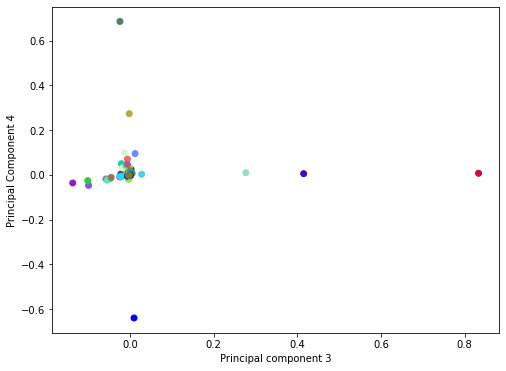

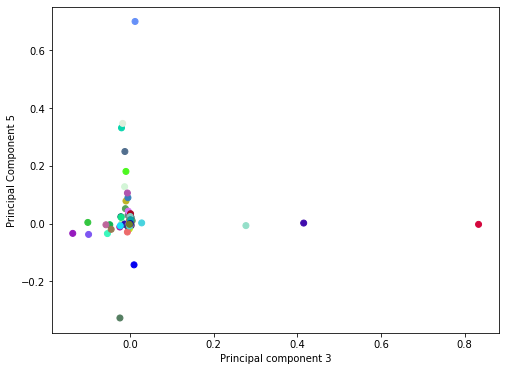

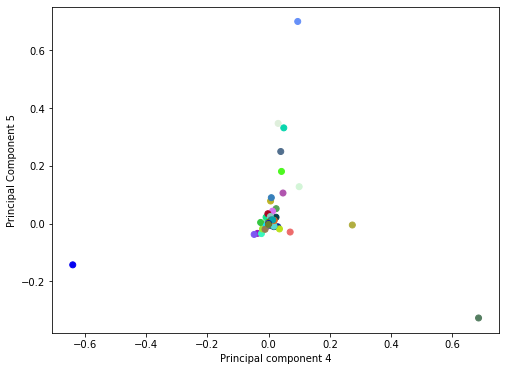

In [59]:
np.random.seed(41)
colors = np.random.rand(107, 3)
for j in range(n_components - 1):
  for k in range(j + 1, n_components):
    plt.figure(figsize=(8,6))
    plt.scatter(pca_dense.components_[j],pca_dense.components_[k], c = colors, cmap='rainbow')
    plt.xlabel(f'Principal component {j + 1}')
    plt.ylabel(f'Principal Component {k + 1}')
    plt.show()
    print()

In [60]:
from sklearn import preprocessing

police_df_nameseries = police_df['Full Name'].values.astype(str)
df_nameseries  = complaints_df['Full Name'].values.astype(str)

df_match = complaints_df.loc[complaints_df['Full Name'].isin(police_df_nameseries)]

officer_allegations_counts_most = df_match['Full Name'].value_counts()[:100]
officers_w_most_allegations = np.array(officer_allegations_counts_most.index)
officers_most = complaints_df.loc[complaints_df['Full Name'].isin(officers_w_most_allegations)]
allegation_groups_most = officers_most.groupby(['Allegation'])
allegation_groups_most.size()

Allegation
Abuse of Authority       24
Action                   32
Arrest/D. A. T.           8
Arrest/Onlooker           6
Beat                     62
                       ... 
Threat to notify ACS     12
Vehicle                   5
Vehicle search          130
Vehicle stop            111
Word                    483
Length: 88, dtype: int64

In [61]:
officer_allegations_counts_least = df_match['Full Name'].value_counts()[-1000:]
officers_w_least_allegations = np.array(officer_allegations_counts_least.index)
officers_least = complaints_df.loc[complaints_df['Full Name'].isin(officers_w_least_allegations)]
allegation_groups_least = officers_least.groupby(['Allegation'])
allegation_groups_least.size()

Allegation
Abuse of Authority       5
Action                  10
Arrest/Onlooker          1
Beat                     7
Black                    5
                        ..
Threat to notify ACS     1
Vehicle                  2
Vehicle search          12
Vehicle stop            13
Word                    91
Length: 75, dtype: int64

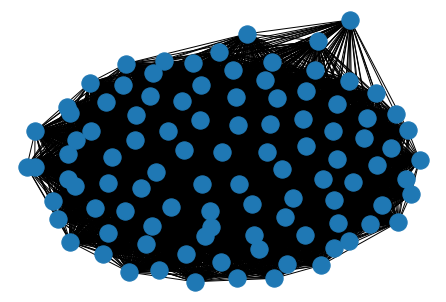

In [62]:
import networkx as nx

G1 = nx.Graph()

for name, group in allegation_groups_most:
  newG = nx.complete_graph(group['Full Name'].tolist())
  G1 = nx.compose(G1, newG)

nx.draw(G1)

In [63]:
most_complaints_degree_centrality = nx.degree_centrality(G1)
most_complaints_closeness_centrality = nx.closeness_centrality(G1)
most_complaints_eigenvector_centrality = nx.eigenvector_centrality(G1)

print("degree centrality: ", sum(most_complaints_degree_centrality.values()) / len(most_complaints_degree_centrality.values()))
print("closeness centrality: ", sum(most_complaints_closeness_centrality.values()) / len(most_complaints_closeness_centrality.values()))

degree centrality:  1.0042424242424246
closeness centrality:  0.9858872762783979


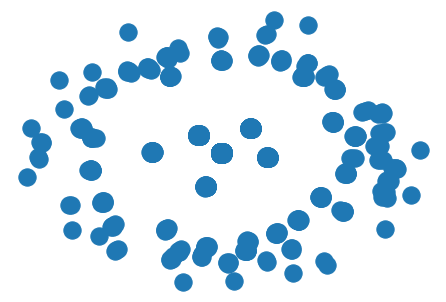

In [64]:
import networkx as nx

G2 = nx.Graph()

for name, group in allegation_groups_least:
  newG = nx.complete_graph(group['Full Name'].tolist())
  G2 = nx.compose(G2, newG)

nx.draw(G2)

In [65]:
few_complaints_degree_centrality = nx.degree_centrality(G2)
few_complaints_closeness_centrality = nx.closeness_centrality(G2)
few_complaints_eigenvector_centrality = nx.eigenvector_centrality(G2)

In [66]:
print("degreee centrality: ", sum(few_complaints_degree_centrality.values()) / len(few_complaints_degree_centrality.values()))
print("closeness centrality: ", sum(few_complaints_closeness_centrality.values())/ len(few_complaints_closeness_centrality.values()))

degreee centrality:  0.11458858858858785
closeness centrality:  0.11458858858858785
